In [1]:
import pandas
import matplotlib.pyplot as plt
import torch
import seaborn as sns
%matplotlib inline


In [2]:
trainData = pandas.read_csv("./titanic/train.csv")
trainData.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


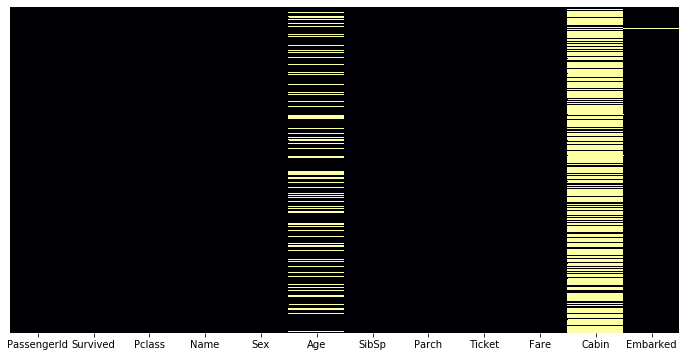

In [3]:
plt.figure(figsize=(12,6))
sns.heatmap(trainData.isnull(),yticklabels=False,cbar=False,cmap="inferno")

In [4]:
cols = ["PassengerId","Name","Ticket","Cabin"]
trainData.drop(cols,axis=1,inplace=True)
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


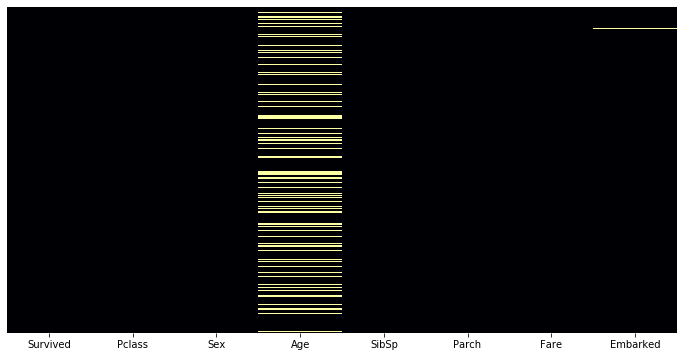

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(trainData.isnull(),yticklabels=False,cbar=False,cmap="inferno")

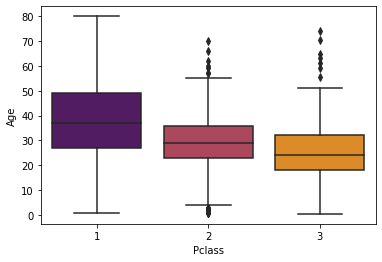

In [6]:
sns.boxplot('Pclass','Age',data = trainData, palette = 'inferno')

In [7]:
def Class_Mean_Age(column):
    age = column[0]
    Class = column[1]
    
    if pandas.isnull(age):
        if Class ==1:
            return 37
        elif Class == 2:
            return 29
        else:
            return 24
    else:
        return age
trainData['Age'] = trainData[['Age','Pclass']].apply(Class_Mean_Age, axis=1)

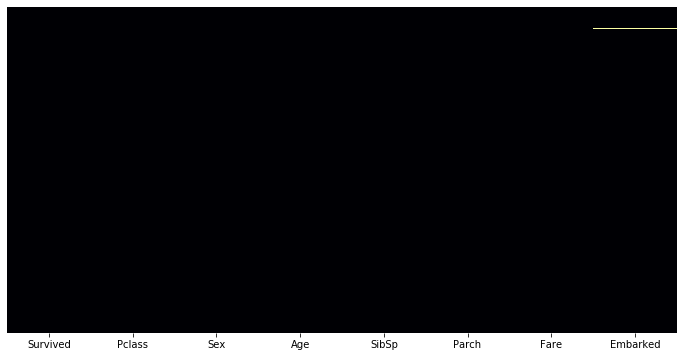

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(trainData.isnull(),yticklabels=False,cbar=False,cmap="inferno")

In [9]:
trainData.iloc[61]

Survived         1
Pclass           1
Sex         female
Age             38
SibSp            0
Parch            0
Fare            80
Embarked       NaN
Name: 61, dtype: object

In [10]:
trainData.dropna(inplace=True)

In [11]:
trainData.iloc[61]

Survived         0
Pclass           1
Sex           male
Age             45
SibSp            1
Parch            0
Fare        83.475
Embarked         S
Name: 62, dtype: object

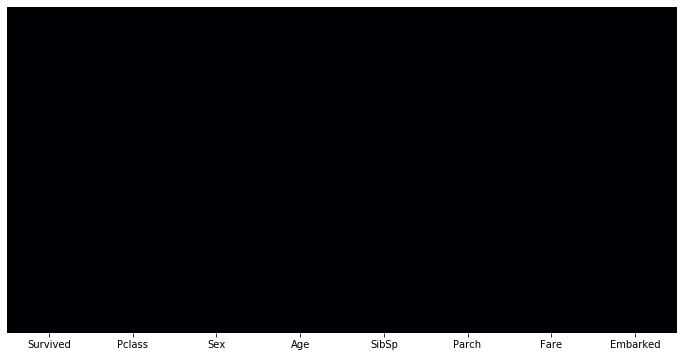

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(trainData.isnull(),yticklabels=False,cbar=False,cmap="inferno")

In [13]:
pd = pandas
Sex = pd.get_dummies(trainData['Sex'], drop_first = True) 
Embarked = pd.get_dummies(trainData['Embarked'], drop_first = True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [14]:
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [15]:
trainData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
cols = ["Sex","Embarked"]
trainData.drop(cols,axis=1,inplace=True)
trainData

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [17]:
trainData = pd.concat([trainData,Sex,Embarked],axis=1)
trainData

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [18]:
tD = trainData.drop("Survived",axis=1)

In [19]:
from torch.nn import functional as F
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear1 = torch.nn.Linear(8,64)
        self.linear2 = torch.nn.Linear(64,32)
        self.linear3 = torch.nn.Linear(32,2)
        self.nc = torch.nn.Dropout(0.2)
        
    def forward(self,x):
        
        x = F.relu(self.linear1(x))
        x = self.nc(x)
        # x = F.relu(self.linear2(x))
        # x = self.nc(x)
        # x = self.linear3(x)
        
        return x
    
    
class PandasDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        return self.dataframe.iloc[index]
    

In [24]:
import numpy as np
m = LinearRegression()
torch.set_default_tensor_type(torch.DoubleTensor)
nay = np.array(tD[:800])
myTensor = torch.from_numpy(nay)
y1 = torch.from_numpy(np.array(trainData["Survived"][:800]))
myTensor.type()


testTensor = torch.from_numpy(np.array(tD[800:])).double()
y2 = torch.from_numpy(np.array(trainData["Survived"][800:]))



In [33]:
optimizer = torch.optim.SGD(m.parameters(),lr=0.01)
creterion = torch.nn.CrossEntropyLoss()


# for epoch in range(50):
#     for i in range(64):
#         start = i * 64
#         end = start + 64
#         out = m(torch.from_numpy(np.array(tD[start:end])))
#         loss = creterion(out,torch.from_numpy(np.array(trainData["Survived"][start:end])))

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         print(f'[{epoch}][{i}]-Loss: {loss}')

m = LinearRegression()

for i in range(1000):
    out = m(torch.from_numpy(nay))
    loss = creterion(out,y1)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'[{i}]-Loss: {loss}')



[0]-Loss: 1.3210300766012981
[1]-Loss: 1.3088664257584952
[2]-Loss: 1.1880555628282827
[3]-Loss: 1.187127137951092
[4]-Loss: 1.241647045682539
[5]-Loss: 1.1833103678611134
[6]-Loss: 1.23559329471968
[7]-Loss: 1.2234508882166681
[8]-Loss: 1.2936989424058576
[9]-Loss: 1.1730352623385556
[10]-Loss: 1.3088525211900048
[11]-Loss: 1.2788694230486573
[12]-Loss: 1.2139955219933256
[13]-Loss: 1.195664503127963
[14]-Loss: 1.226991082792831
[15]-Loss: 1.23932357976721
[16]-Loss: 1.361041186533669
[17]-Loss: 1.2311045639472793
[18]-Loss: 1.2126885324021597
[19]-Loss: 1.2102712940214975
[20]-Loss: 1.2378590640314178
[21]-Loss: 1.2348492574850782
[22]-Loss: 1.2543004876792636
[23]-Loss: 1.2317601955602988
[24]-Loss: 1.2494589445788449
[25]-Loss: 1.2795926843389576
[26]-Loss: 1.2771876016805677
[27]-Loss: 1.2184466357442947
[28]-Loss: 1.138135830465446
[29]-Loss: 1.2633357623329489
[30]-Loss: 1.2763990887848184
[31]-Loss: 1.2870042971332127
[32]-Loss: 1.2542779959022308
[33]-Loss: 1.2479304825656956


[297]-Loss: 1.266591728036797
[298]-Loss: 1.2209863782345125
[299]-Loss: 1.2131872583019219
[300]-Loss: 1.2267600515409918
[301]-Loss: 1.243998277871482
[302]-Loss: 1.1425589757241712
[303]-Loss: 1.3774994443474495
[304]-Loss: 1.2439217396473896
[305]-Loss: 1.2699330723220932
[306]-Loss: 1.2413251133233003
[307]-Loss: 1.1746938254791421
[308]-Loss: 1.2486070556620126
[309]-Loss: 1.3587972661679906
[310]-Loss: 1.2501660303871858
[311]-Loss: 1.3186420277077602
[312]-Loss: 1.3227863479268183
[313]-Loss: 1.2367099096142729
[314]-Loss: 1.2310635306503395
[315]-Loss: 1.2294790444647865
[316]-Loss: 1.3568088959133062
[317]-Loss: 1.305625270290222
[318]-Loss: 1.2640309639236658
[319]-Loss: 1.1639001154652993
[320]-Loss: 1.2229427921905311
[321]-Loss: 1.1895542564332393
[322]-Loss: 1.2677155776789641
[323]-Loss: 1.22576703141508
[324]-Loss: 1.2415141150503175
[325]-Loss: 1.2288450357833949
[326]-Loss: 1.1662073369395292
[327]-Loss: 1.2242847364793998
[328]-Loss: 1.3028357856667778
[329]-Loss: 1

[580]-Loss: 1.3119687439217755
[581]-Loss: 1.3030158899806141
[582]-Loss: 1.2756127135959976
[583]-Loss: 1.1582250468856807
[584]-Loss: 1.2202250131267978
[585]-Loss: 1.108533684676987
[586]-Loss: 1.2051243556117557
[587]-Loss: 1.2119012396232538
[588]-Loss: 1.267976489224812
[589]-Loss: 1.2600282620753633
[590]-Loss: 1.2686258812840168
[591]-Loss: 1.1798904966521435
[592]-Loss: 1.3357290676504305
[593]-Loss: 1.1734068062846903
[594]-Loss: 1.2912201114482018
[595]-Loss: 1.2164333689578124
[596]-Loss: 1.346622630908027
[597]-Loss: 1.2794896112828678
[598]-Loss: 1.1501574725003463
[599]-Loss: 1.2281752294076353
[600]-Loss: 1.2608134504176092
[601]-Loss: 1.3121473584470755
[602]-Loss: 1.3160309202484919
[603]-Loss: 1.2387408480096624
[604]-Loss: 1.2361716145381991
[605]-Loss: 1.1841058750351325
[606]-Loss: 1.290641368332063
[607]-Loss: 1.1835089492699857
[608]-Loss: 1.1892669902347313
[609]-Loss: 1.1294937117036816
[610]-Loss: 1.2731461378142612
[611]-Loss: 1.1856482770217749
[612]-Loss: 

[863]-Loss: 1.2605765735726644
[864]-Loss: 1.1897787419198482
[865]-Loss: 1.2872073709264782
[866]-Loss: 1.2771250749928558
[867]-Loss: 1.2118617867856158
[868]-Loss: 1.178550209850075
[869]-Loss: 1.2325199353741163
[870]-Loss: 1.203576985867227
[871]-Loss: 1.2274749819162407
[872]-Loss: 1.3197195389336165
[873]-Loss: 1.2191969925765518
[874]-Loss: 1.2694822524656306
[875]-Loss: 1.220383604578975
[876]-Loss: 1.2386069211710131
[877]-Loss: 1.2470545600314176
[878]-Loss: 1.21553016597782
[879]-Loss: 1.1784752743541924
[880]-Loss: 1.2233655797179313
[881]-Loss: 1.2733435749323203
[882]-Loss: 1.1836128693777908
[883]-Loss: 1.2338115766122675
[884]-Loss: 1.2505908448968126
[885]-Loss: 1.240164878152803
[886]-Loss: 1.2403515767393425
[887]-Loss: 1.2478395704961327
[888]-Loss: 1.1895390268073804
[889]-Loss: 1.2428257234565445
[890]-Loss: 1.2516148061148147
[891]-Loss: 1.2271701700760234
[892]-Loss: 1.1755504946966953
[893]-Loss: 1.2926991741428653
[894]-Loss: 1.2598287888445676
[895]-Loss: 1.

In [27]:
with torch.no_grad():
    predict = m(testTensor)

predict
    


tensor([[-1.0928e+00, -7.3249e-01],
        [ 2.2659e+00, -3.7911e+00],
        [-6.6992e-02,  7.3974e-02],
        [ 1.2795e+00, -1.6786e-01],
        [-1.4836e-01,  2.5209e-01],
        [ 1.2739e+00, -2.8391e+00],
        [-4.2356e-01, -6.8275e-01],
        [ 2.8024e+00, -2.0402e+00],
        [ 3.9876e-01,  3.1704e-01],
        [-1.5064e-01, -1.1391e-01],
        [ 3.9996e-01, -8.4061e-01],
        [-1.0273e-01, -1.2496e+00],
        [ 3.2876e-01,  2.0180e-01],
        [ 1.5018e+00, -5.8325e-01],
        [ 1.3079e+00, -1.5747e+00],
        [ 8.4499e-01, -1.5013e+00],
        [ 6.2586e-01, -2.1185e+00],
        [-1.5964e-01, -7.2216e-01],
        [ 5.3433e-02, -3.1464e-01],
        [-3.3839e+00,  8.4190e-01],
        [ 1.1862e+00, -1.0072e+00],
        [ 1.2574e+00, -1.1790e+00],
        [ 1.9432e+00, -2.0541e+00],
        [ 6.4281e-01,  1.1749e-01],
        [ 3.8304e-01, -6.7390e-02],
        [ 7.7831e-01, -1.0373e+00],
        [ 8.0395e-01, -1.4824e+00],
        [ 2.0523e-01, -7.794

In [34]:
values,labels = torch.max(predict,1)

In [35]:
labels

tensor([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [36]:
y2

tensor([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [37]:
labels == y2
a = y2.data.numpy() == labels.data.numpy()
sum(a == True) / len(y2)


0.6292134831460674

In [38]:
y2.size()

torch.Size([89])